### StarAgile ML Project - Level 2 - Assignment 5 (Credit card Fraud)

### Assignment Submitted by VINAY M on 15-09-2023

- Build a model to detect credit card fraud
- Perform data cleaning
- Deal with missing and duplicate values if present
- Check Whether the classes are balanced or not
- Check the performance of models without dealing with imbalanced classes
- Explain the use of under-sampling and over-sampling for imbalanced classification
- Train the model using several classification models and find the best model after under-sampling the dataset
- Train the model using several classification models and find the best model after over-sampling the dataset
- Use hyperparameter tuning to find best parameters for the algorithm
- Evaluate the model using various classification evaluation metrics

- Dataset link:
https://drive.google.com/file/d/1xiqCjwcCzspCXEk0oOvoKch1AOthuSp3/view?usp=share_link

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
# High Dimensional data with different scales

In [9]:
#Dropping Null rows
df.dropna(inplace = True)

In [10]:
# Dropping Duplicated Row
dup = df.duplicated().sum()
print(dup)
df.drop_duplicates(inplace=True)

1081


In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Checking Null entries
df.isna().any(axis=1).sum()

0

In [36]:
# subsetting columns for correlation 
col_selected = list(df.columns)

In [37]:
col_selected

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [38]:
col_selected = [x for x in col_selected if x not in ['Time','Amount']]

In [39]:
col_selected

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Class']

In [40]:
df_selected = df[col_selected]

In [41]:
df_selected

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


<Axes: >

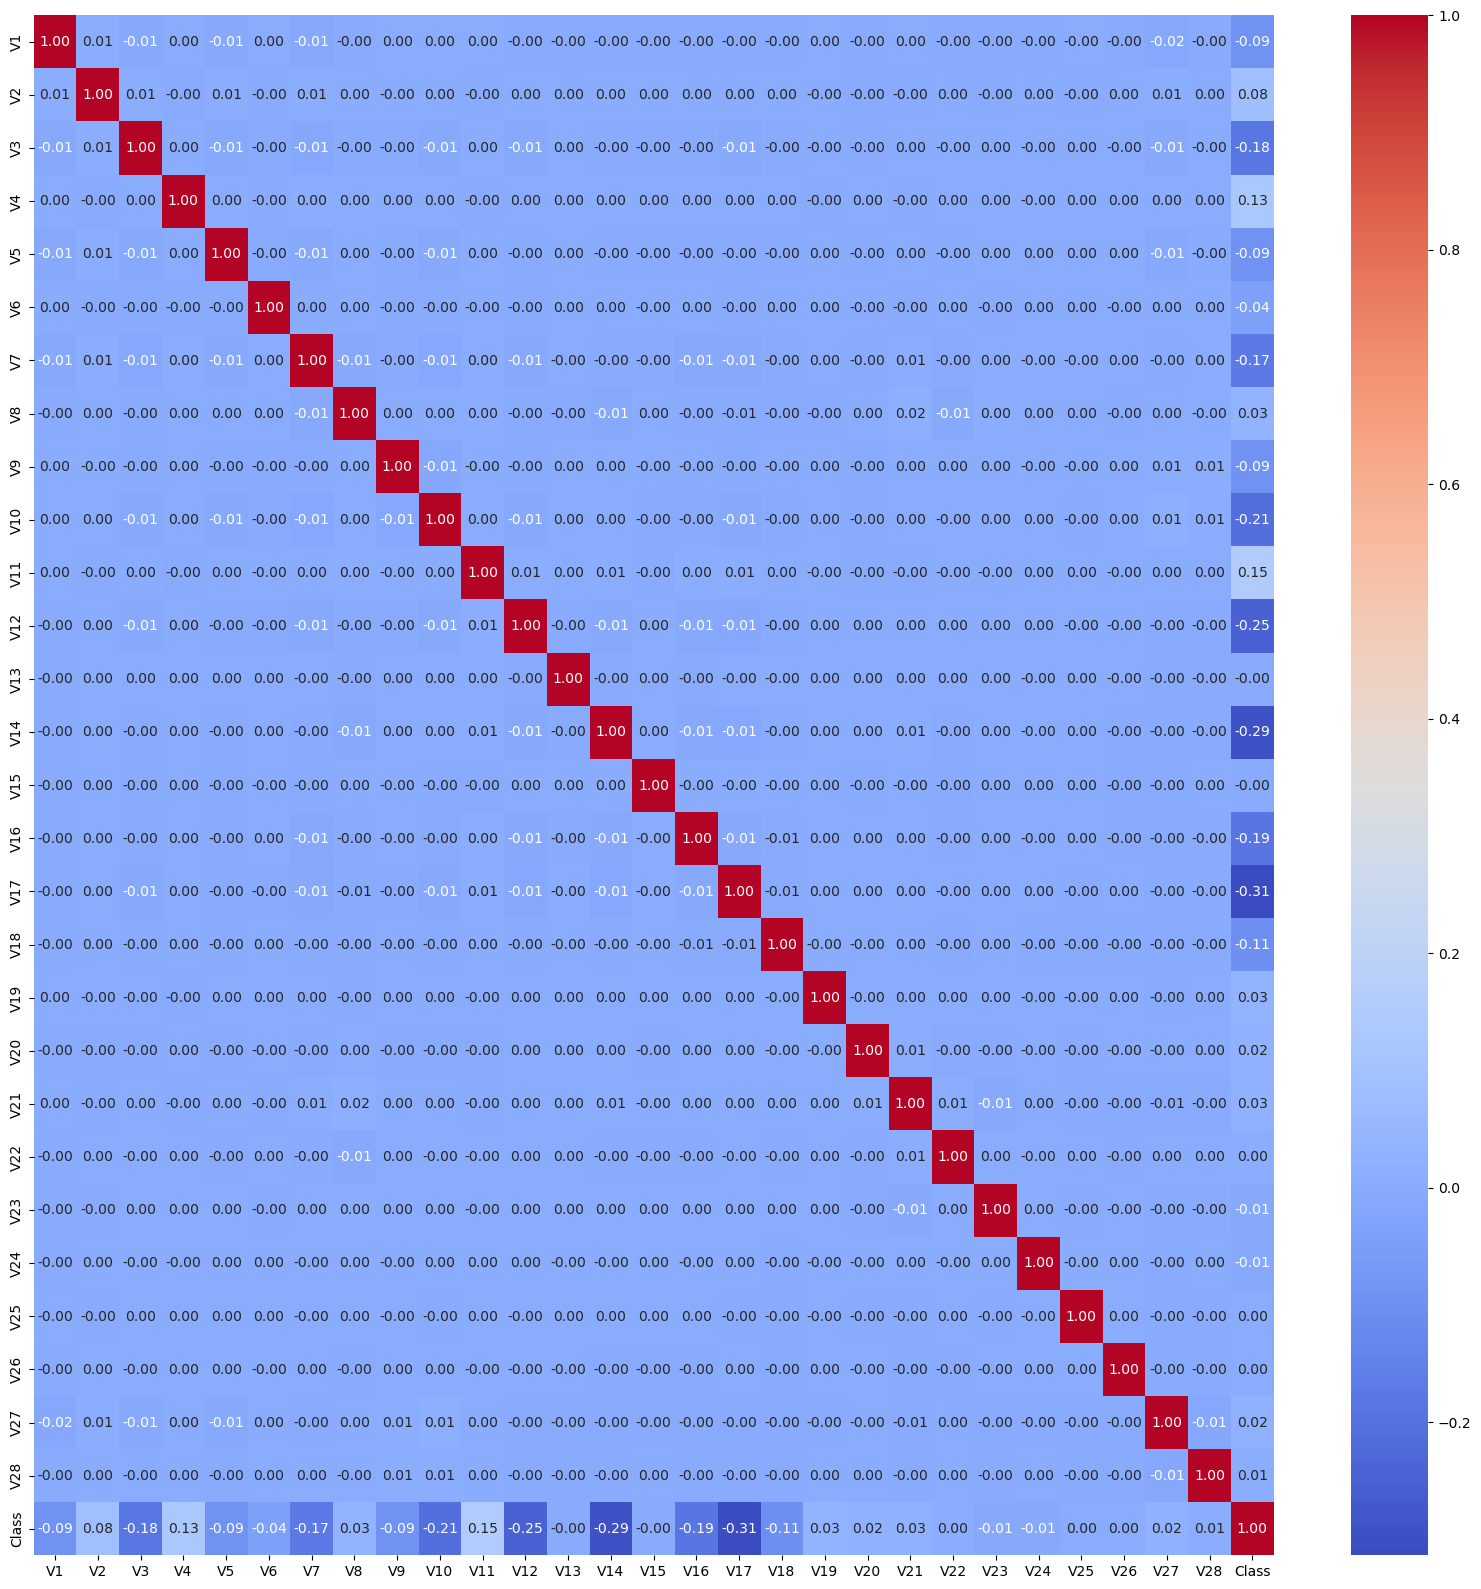

In [44]:
# Correlation between numerical columns
plt.figure(figsize=(20,20))
sns.heatmap(df_selected.corr(),annot=True,cmap='coolwarm', fmt='.2f')

In [45]:
# No clear idea in important features for modelling, so there is requirement to proceed with diffrent feature selection techniques.!

In [46]:
# Feature Selection

In [47]:
# Method 1: Fisher Score (chi-square implementation)

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X = df_selected.iloc[:, :-1]  # Features
y = df_selected.iloc[:, -1]   # Labels

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Calculate chi-square scores on the scaled features
chi2_scores = chi2(X_scaled, y)

# Extract p-values from the chi2_scores
p_values = chi2_scores[1]

# Calculate Fisher Score
fisher_scores = -np.log10(p_values)

k = 10  
selector = SelectKBest(score_func=lambda X, y: fisher_scores, k=k)
X_new = selector.fit_transform(X_scaled, y)

# Print the selected features
chi2_features = X.columns[selector.get_support()]
print("Selected Features:", chi2_features)

Selected Features: Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')


In [51]:
# Method 2: ANOVA F-value For Feature Selection

In [81]:
from sklearn.feature_selection import f_classif
# Select the top k features based on ANOVA F-value
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Print the selected features
anova_features = X.columns[selector.get_support()]
print("Selected Features:", anova_features)

Selected Features: Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')


In [82]:
# Creating Ensemble of Important Features
# Creating Sets from chi2_features and anova_features
a = set(chi2_features)
b = set(anova_features)
Top_Features = sorted(list(a.union(b)), reverse=True)
Top_Features

['V9', 'V7', 'V4', 'V3', 'V18', 'V17', 'V16', 'V14', 'V12', 'V11', 'V10']

In [83]:
len(Top_Features)

11

In [66]:
#Total 11 most significant features are selected for the further studies

In [84]:
# Creating a new frame
newCol = Top_Features
newCol

['V9', 'V7', 'V4', 'V3', 'V18', 'V17', 'V16', 'V14', 'V12', 'V11', 'V10']

In [85]:
newCol.append("Class")

In [86]:
newCol

['V9',
 'V7',
 'V4',
 'V3',
 'V18',
 'V17',
 'V16',
 'V14',
 'V12',
 'V11',
 'V10',
 'Class']

In [87]:
dfFinal = df[newCol]

In [88]:
dfFinal

,V9,V7,V4,V3,V18,V17,V16,V14,V12,V11,V10,Class
0,0.363787,0.239599,1.378155,2.536347,0.025791,0.207971,-0.470401,-0.311169,-0.617801,-0.551600,0.090794,0
1,-0.255425,-0.078803,0.448154,0.166480,-0.183361,-0.114805,0.463917,-0.143772,1.065235,1.612727,-0.166974,0
2,-1.514654,0.791461,0.379780,1.773209,-0.121359,1.109969,-2.890083,-0.165946,0.066084,0.624501,0.207643,0
3,-1.387024,0.237609,-0.863291,1.792993,1.965775,-0.684093,-1.059647,-0.287924,0.178228,-0.226487,-0.054952,0
4,0.817739,0.592941,0.403034,1.548718,-0.038195,-0.237033,-0.451449,-1.119670,0.538196,-0.822843,0.753074,0
...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.914428,-4.918215,-2.066656,-9.834783,0.510632,1.991691,1.107641,4.626942,2.711941,-1.593105,4.356170,0
284803,0.584800,0.024330,-0.738589,2.035030,-1.221179,-0.025693,-0.711757,-0.675143,0.915802,-0.150189,-0.975926,0
284804,0.432454,-0.296827,-0.557828,-3.249640,0.395652,0.313502,0.140716,-0.510602,0.063119,0.411614,-0.484782,0
284805,0.392087,-0.686180,0.689799,0.702510,1.113981,0.509928,-0.608577,0.449624,-0.962886,-1.933849,-0.399126,0


In [91]:
# Reordering
dfOrdered = df.reindex(columns=['V3','V4','V7','V9','V10','V11','V12','V14','V16','V17','V18','Class'])

In [92]:
dfOrdered

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0
...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-9.834783,-2.066656,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,0
284803,2.035030,-0.738589,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,0
284804,-3.249640,-0.557828,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,0
284805,0.702510,0.689799,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,0


In [93]:
# Checing Balance in the Data
NonFraud = dfOrdered[dfOrdered['Class'] == 0]
Fraud = dfOrdered[dfOrdered['Class'] == 1]

In [95]:
len(NonFraud)

283253

In [96]:
Fraud

473

In [97]:
Pecentage_Fraud = len(Fraud)/len(dfOrdered)*100

In [98]:
Pecentage_Fraud

0.1667101358352777

In [100]:
# 0.16% data belongs to fraud and 99.833% Non-Fraud.
100 - Pecentage_Fraud

99.83328986416473

In [101]:
# Undersampling must be done on majority samples of the target variable.

In [115]:
# Undersampling through unbiased random row selection
n = int(round(len(Fraud)*1.3,0))

In [116]:
n

615

In [117]:
undersampledDF_NonFraud = NonFraud.sample(n)

In [118]:
undersampledDF_NonFraud

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
204672,-0.645555,-0.226333,0.657229,-0.160139,-1.012902,-1.419184,-0.447227,-0.839602,0.199874,0.132574,0.985385,0
11195,-3.300996,1.328576,-1.317298,0.680243,0.220483,1.043241,-1.319899,4.194326,0.549076,1.509883,0.959809,0
124222,0.924527,0.379391,-0.666701,0.247487,-0.027557,1.754849,0.891907,0.328812,0.224365,-0.199789,-0.450765,0
201850,-0.967302,-0.689078,0.632001,0.527024,0.424436,-0.035527,0.669456,0.117818,-0.245921,-0.733402,0.182042,0
22203,0.454911,0.419529,-0.268450,-0.056560,0.045373,1.748059,0.647551,0.712818,-0.039861,-0.047598,-0.817727,0
...,...,...,...,...,...,...,...,...,...,...,...,...
176806,-0.855592,0.228456,-0.358298,1.000985,0.060851,-1.024946,-0.120508,0.169038,0.229355,-0.405941,-0.246612,0
275707,0.136099,-0.671405,0.999546,0.113096,-0.107851,-0.984275,0.261438,-0.027189,-0.085751,-0.488393,-0.753509,0
228516,-1.843302,-1.589636,-0.436569,-1.683131,1.587385,-1.152898,-0.543392,-0.279145,-1.160425,0.688561,-0.508723,0
181988,-0.350708,0.291507,-0.857244,0.985568,0.132625,0.318657,1.127814,-0.250795,1.014570,-1.199349,0.731150,0


In [119]:
Fraud

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
541,-1.609851,3.997906,-2.537387,-2.770089,-2.772272,3.202033,-2.899907,-4.289254,-1.140747,-2.830056,-0.016822,1
623,1.088463,2.288644,0.325574,-0.270953,-0.838587,-0.414575,-0.503141,-1.692029,0.666780,0.599717,1.725321,1
4920,-0.359745,2.330243,0.562320,-0.238253,-1.525412,2.032912,-6.560124,-1.470102,-2.282194,-4.781831,-2.615665,1
6108,-2.592844,2.679787,-3.496197,-0.247768,-4.801637,4.895844,-10.912819,-6.771097,-7.358083,-12.598419,-5.131549,1
6329,-4.304597,4.732795,1.713445,-1.282858,-2.447469,2.101344,-4.609628,-6.079337,2.581851,6.739384,3.042493,1
...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-4.518331,1.749293,-0.882850,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,-1.315147,1
280143,-5.004247,1.411850,-1.413170,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505,1
280149,-2.213700,0.468308,-2.234739,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,-0.507000,1
281144,-5.399730,1.817092,-2.208002,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,-1.478138,1


In [120]:
balancedDF = pd.concat([undersampledDF_NonFraud, Fraud], axis=0, ignore_index=True)

In [121]:
balancedDF

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,-0.645555,-0.226333,0.657229,-0.160139,-1.012902,-1.419184,-0.447227,-0.839602,0.199874,0.132574,0.985385,0
1,-3.300996,1.328576,-1.317298,0.680243,0.220483,1.043241,-1.319899,4.194326,0.549076,1.509883,0.959809,0
2,0.924527,0.379391,-0.666701,0.247487,-0.027557,1.754849,0.891907,0.328812,0.224365,-0.199789,-0.450765,0
3,-0.967302,-0.689078,0.632001,0.527024,0.424436,-0.035527,0.669456,0.117818,-0.245921,-0.733402,0.182042,0
4,0.454911,0.419529,-0.268450,-0.056560,0.045373,1.748059,0.647551,0.712818,-0.039861,-0.047598,-0.817727,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1083,-4.518331,1.749293,-0.882850,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,-1.315147,1
1084,-5.004247,1.411850,-1.413170,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505,1
1085,-2.213700,0.468308,-2.234739,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,-0.507000,1
1086,-5.399730,1.817092,-2.208002,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,-1.478138,1


<Axes: >

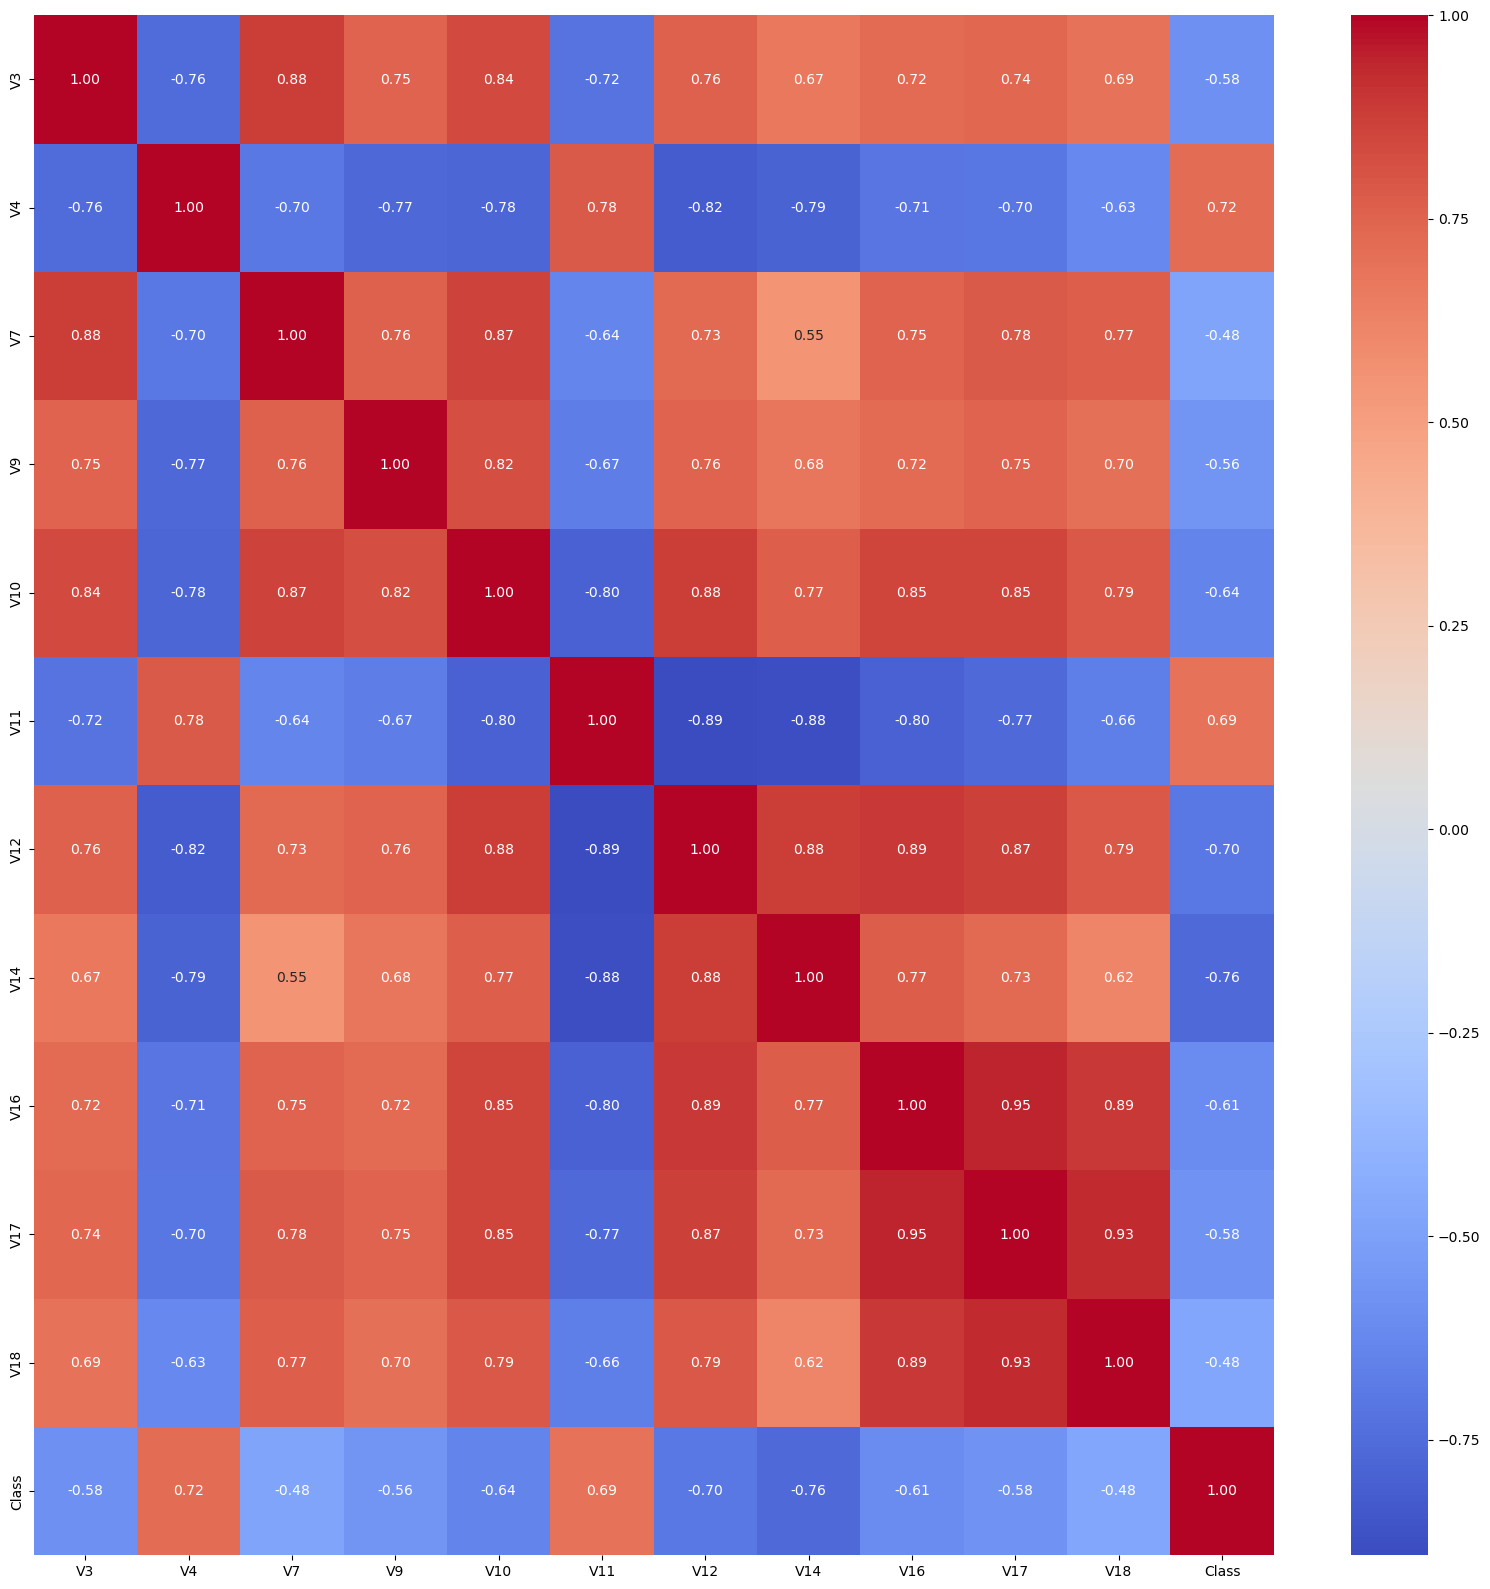

In [122]:
# Correlation between numerical columns
plt.figure(figsize=(20,20))
sns.heatmap(balancedDF.corr(),annot=True,cmap='coolwarm', fmt='.2f')

In [123]:
# Checking outliers

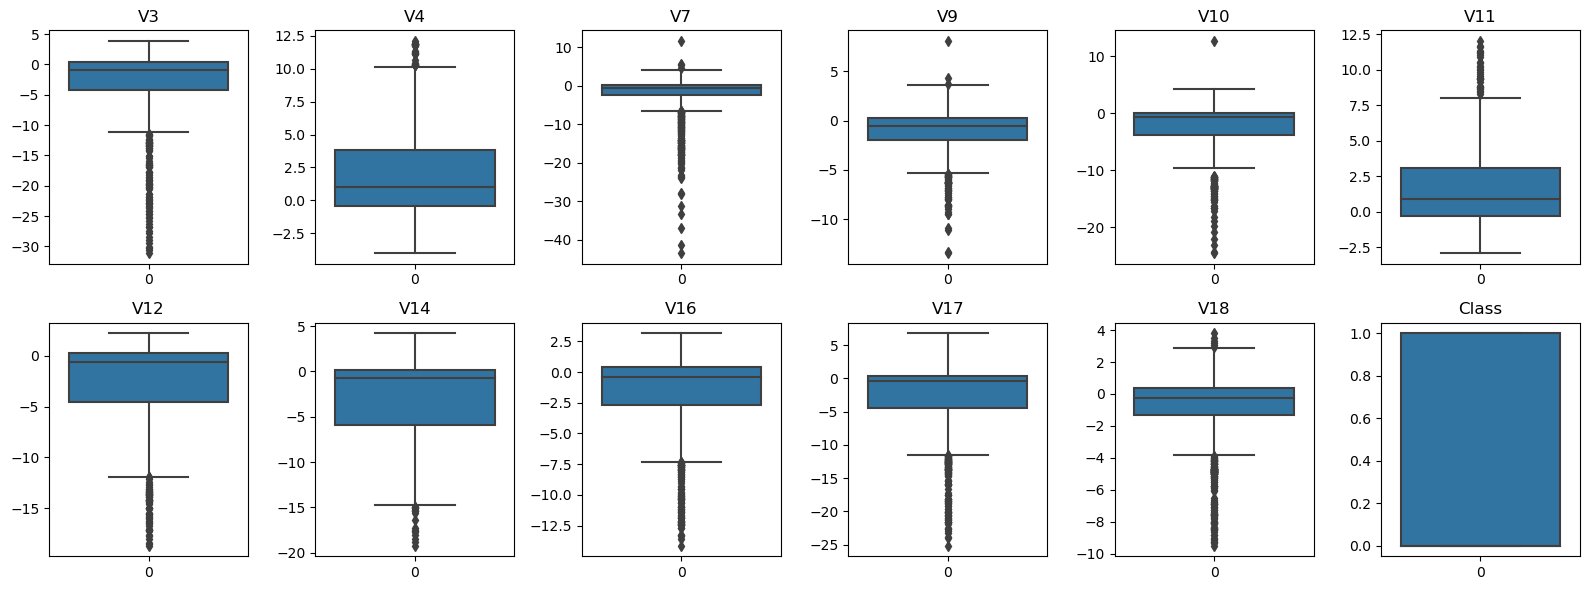

In [130]:
# Create a 2x6 subplot grid for vertical boxplots using Seaborn
plt.figure(figsize=(16, 6))
for i, column in enumerate(balancedDF.columns):
    plt.subplot(2, 6, i + 1)
    sns.boxplot(data=balancedDF[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [131]:
# Since values are from PCA, no need to treat the outliers, if we treat then we tend to loose the information

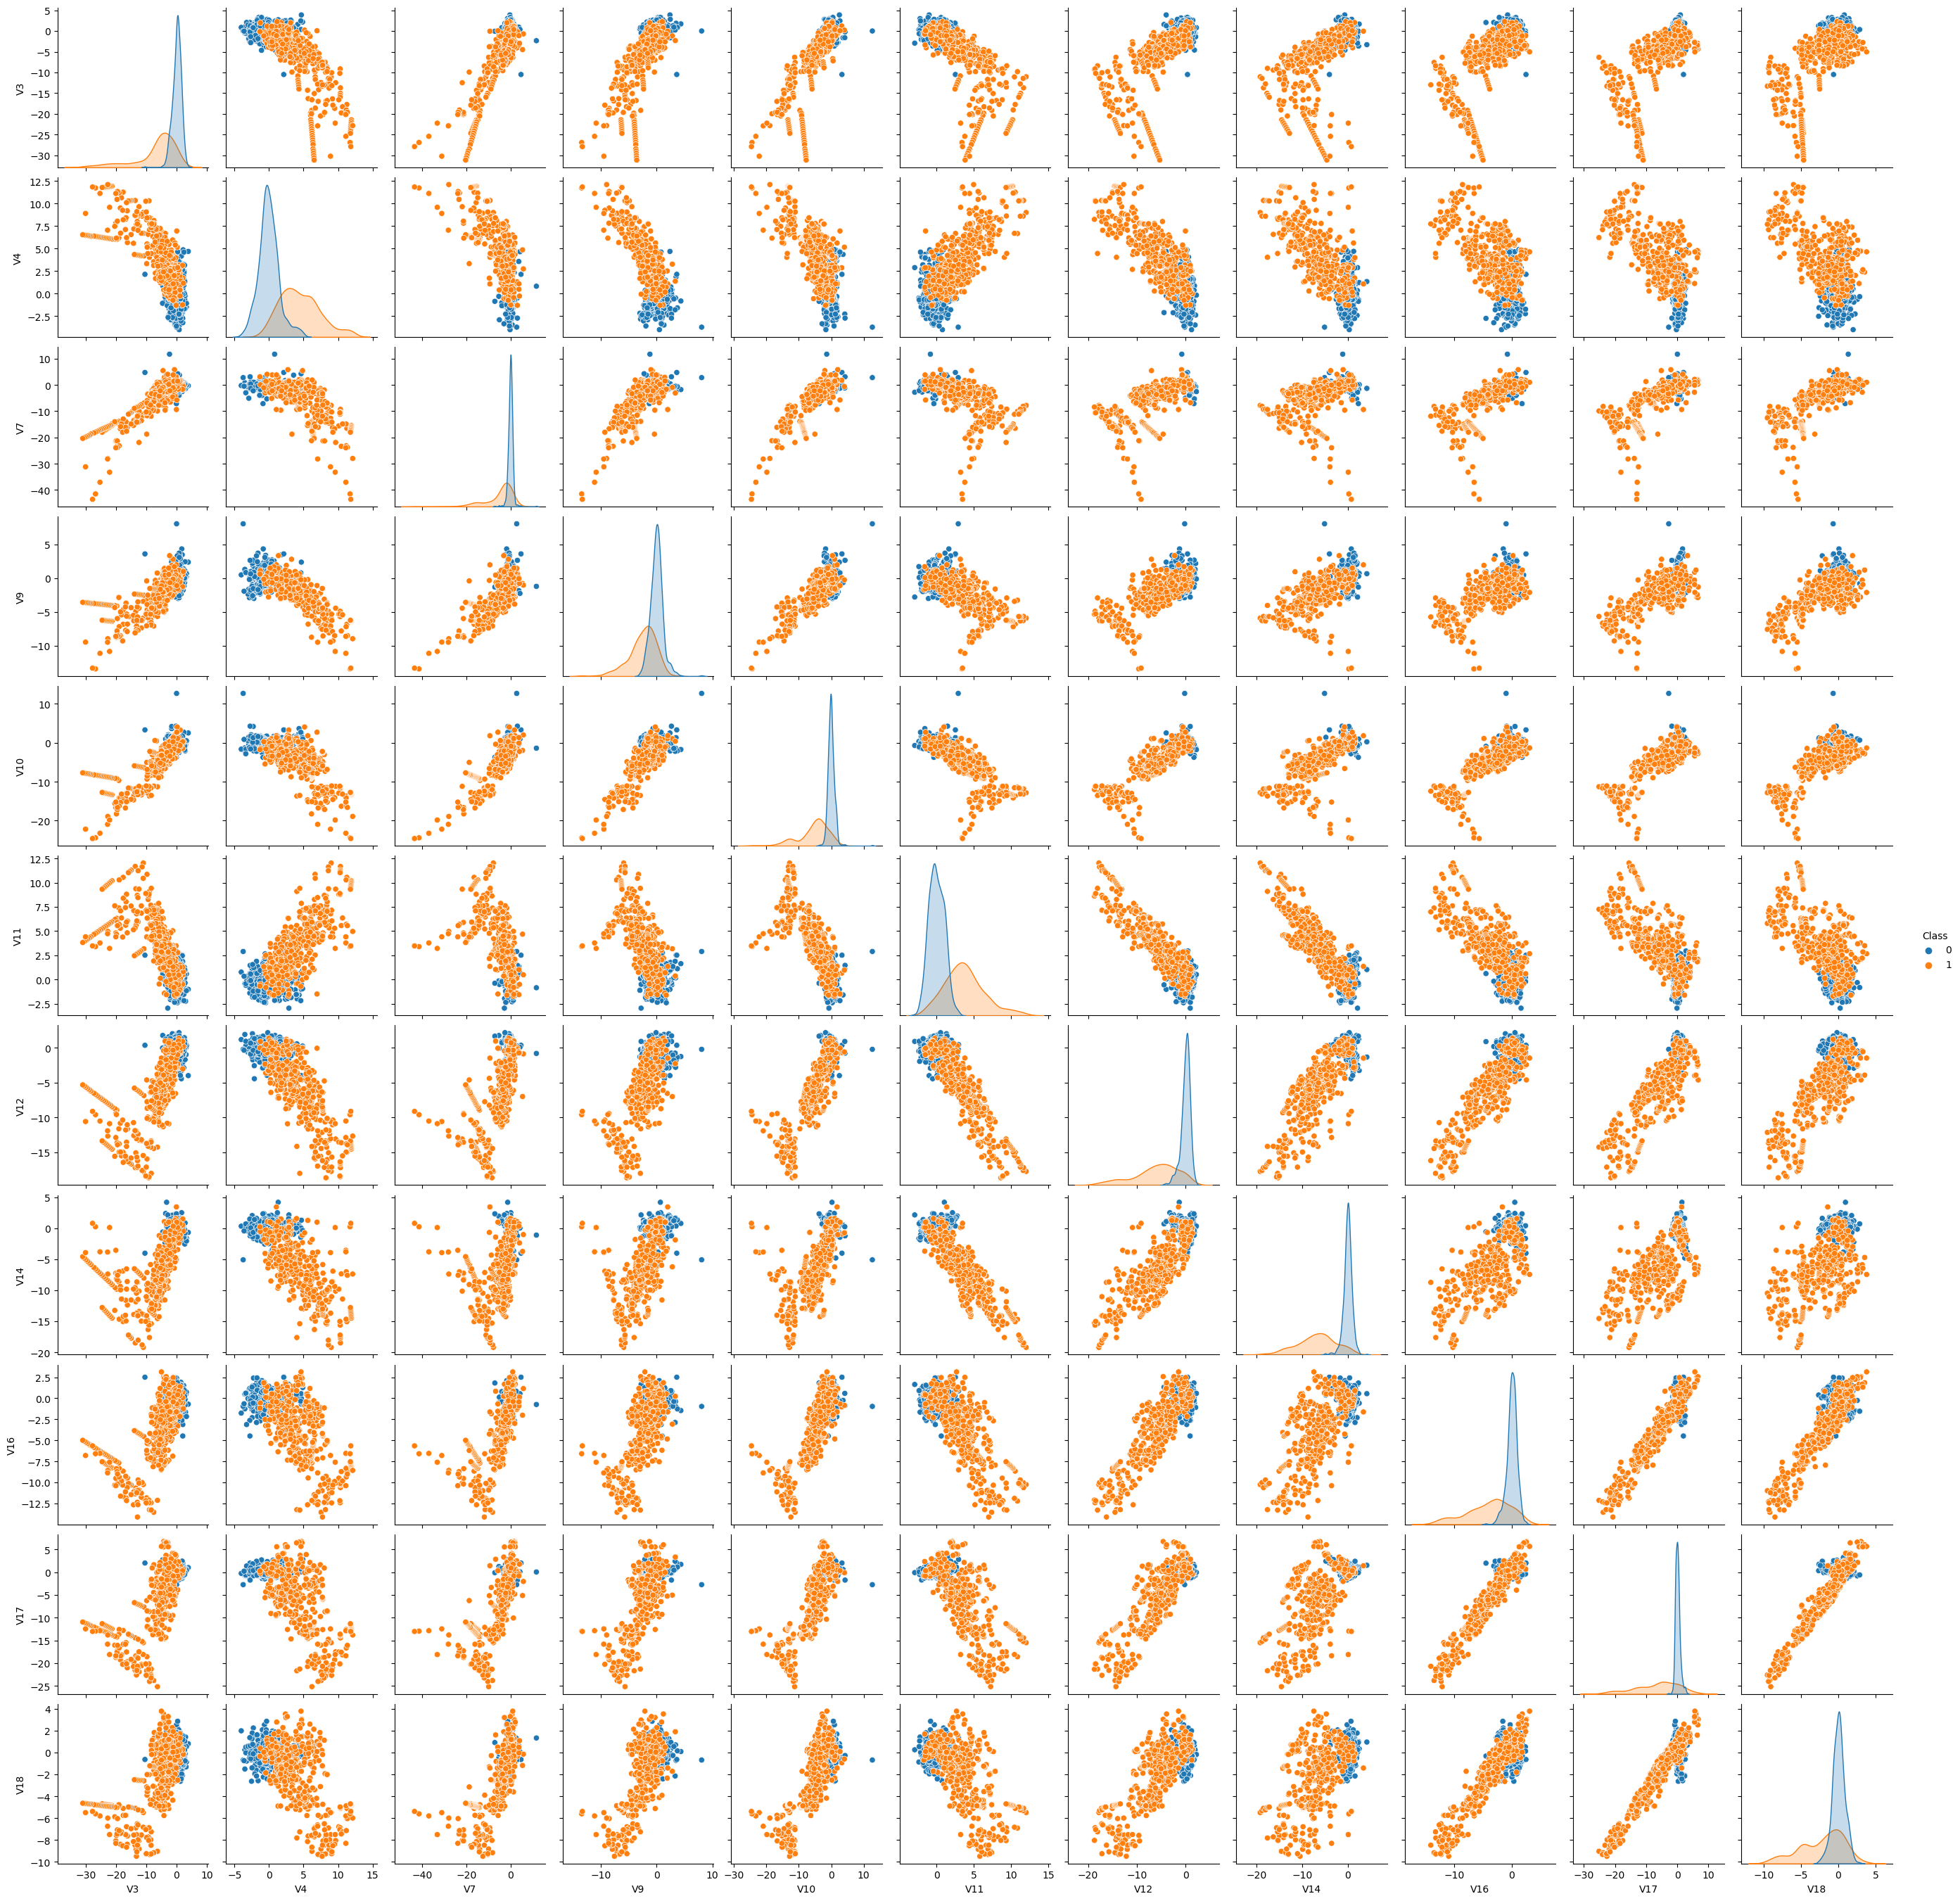

In [136]:
sns.pairplot(balancedDF, diag_kind='kde', hue='Class')

In [137]:
# Feature Engineering

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
X = balancedDF.iloc[:, :-1]  # Features
y = balancedDF.iloc[:, -1]   # Labels

In [140]:
X

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-0.645555,-0.226333,0.657229,-0.160139,-1.012902,-1.419184,-0.447227,-0.839602,0.199874,0.132574,0.985385
1,-3.300996,1.328576,-1.317298,0.680243,0.220483,1.043241,-1.319899,4.194326,0.549076,1.509883,0.959809
2,0.924527,0.379391,-0.666701,0.247487,-0.027557,1.754849,0.891907,0.328812,0.224365,-0.199789,-0.450765
3,-0.967302,-0.689078,0.632001,0.527024,0.424436,-0.035527,0.669456,0.117818,-0.245921,-0.733402,0.182042
4,0.454911,0.419529,-0.268450,-0.056560,0.045373,1.748059,0.647551,0.712818,-0.039861,-0.047598,-0.817727
...,...,...,...,...,...,...,...,...,...,...,...
1083,-4.518331,1.749293,-0.882850,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,-1.315147
1084,-5.004247,1.411850,-1.413170,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505
1085,-2.213700,0.468308,-2.234739,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,-0.507000
1086,-5.399730,1.817092,-2.208002,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,-1.478138


In [142]:
scaler = StandardScaler()
X_Std = scaler.fit_transform(X)

In [143]:
X_Std

array([[ 0.39234431, -0.68309682,  0.56159126, ...,  0.58679063,
         0.51129711,  0.83224533],
       [-0.06880616, -0.18677244,  0.18519924, ...,  0.69312608,
         0.75506609,  0.82104779],
       [ 0.6650088 , -0.48975088,  0.30921861, ...,  0.59424842,
         0.45247238,  0.20348263],
       ...,
       [ 0.12001645, -0.46136845,  0.01031297, ...,  0.03779413,
        -0.40336555,  0.17886226],
       [-0.43327762, -0.03083895,  0.01540975, ..., -0.25041902,
        -0.32892231, -0.24631296],
       [ 0.05580628, -0.48040492,  0.47882646, ...,  0.68410027,
         0.64775379,  0.92503046]])

In [144]:
columns = X.columns
X_Final = pd.DataFrame(data=X_Std, columns=columns)

In [145]:
X_Final

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,0.392344,-0.683097,0.561591,0.422923,0.332750,-1.136593,0.516065,0.482314,0.586791,0.511297,0.832245
1,-0.068806,-0.186772,0.185199,0.802305,0.628323,-0.212722,0.313993,1.614935,0.693126,0.755066,0.821048
2,0.665009,-0.489751,0.309219,0.606942,0.568882,0.054265,0.826149,0.745204,0.594248,0.452472,0.203483
3,0.336469,-0.830804,0.556782,0.733136,0.677200,-0.617462,0.774639,0.697731,0.451042,0.358029,0.480532
4,0.583454,-0.476939,0.385135,0.469683,0.586359,0.051717,0.769567,0.831604,0.513789,0.479409,0.042822
...,...,...,...,...,...,...,...,...,...,...,...
1083,-0.280212,-0.052481,0.268015,-0.436982,-0.763597,0.189688,-0.634812,-0.828426,-0.356488,-0.321102,-0.174954
1084,-0.364597,-0.160192,0.166924,-0.013735,-0.199081,0.468328,-0.097485,-0.501046,-0.130381,-0.090411,0.099397
1085,0.120016,-0.461368,0.010313,0.200765,-0.254616,0.069317,-0.022949,-0.241629,0.037794,-0.403366,0.178862
1086,-0.433278,-0.030839,0.015410,-0.241684,-0.681684,0.121300,-0.545210,-0.772503,-0.250419,-0.328922,-0.246313


In [146]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1083    1
1084    1
1085    1
1086    1
1087    1
Name: Class, Length: 1088, dtype: int64

In [147]:
# Splitting Balanced and Standardised Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Final,y,test_size=0.3,random_state=42)

In [148]:
X_train

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
1034,-0.028938,0.215244,-0.057107,-0.258766,-0.265408,-0.064117,0.165791,-0.448842,0.222186,0.343186,0.535590
249,0.472051,-0.875147,0.407203,-0.197510,0.764255,0.079957,0.752472,0.712676,0.706881,0.556909,-0.321766
620,-0.579322,1.520030,0.125260,-0.766961,-0.907406,1.521079,-1.662239,-1.734270,-0.095873,0.288002,0.451817
837,0.158149,0.269037,0.205835,-0.158119,-0.371349,0.356610,-0.170441,-0.393639,-0.480808,-0.261012,0.072120
71,0.407056,0.587768,0.448860,0.010071,0.970674,-0.445291,0.694707,0.765046,0.795928,0.319144,0.527467
...,...,...,...,...,...,...,...,...,...,...,...
330,0.559149,-0.391554,0.459751,0.473459,0.503979,-0.596483,0.739550,0.582491,0.664473,0.481141,0.241855
466,0.142569,-1.150686,0.361839,-0.278550,0.947521,-1.160199,0.509047,0.587001,0.194862,0.583688,0.192458
121,0.528525,0.568243,0.324086,0.249926,0.946708,-0.594036,0.720716,0.650964,0.961131,0.263080,0.675428
1044,0.140302,-0.368338,0.528290,0.966974,0.222017,-0.599992,0.731469,0.146349,0.666369,0.747662,0.791231


In [149]:
X_test

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
355,0.861609,-1.647351,0.350230,0.867231,0.188575,-0.666022,0.668100,0.588479,-0.425726,0.728907,0.058207
56,0.143976,-1.135981,0.644187,0.456527,0.559347,-0.664365,0.566824,0.766906,0.542486,0.347056,0.315915
478,0.756488,-0.639421,0.583305,0.366950,0.620707,0.045567,0.721023,0.572288,0.656690,0.441218,0.524512
701,0.217533,0.606425,0.016493,-0.422964,-0.079739,0.284474,-0.227130,-0.396259,-0.229108,-0.384921,-0.714449
724,0.021857,0.621158,-0.363425,-0.800482,-0.692378,0.830496,-1.115256,-1.247484,-1.356209,-1.228757,-1.708644
...,...,...,...,...,...,...,...,...,...,...,...
877,-0.393015,0.408555,-0.792380,-0.955737,-1.520436,1.427900,-1.270826,-1.622296,-1.715407,-2.108382,-1.734425
585,0.660294,-0.560941,0.407638,0.606092,0.660264,-0.387922,0.748144,0.700796,0.726260,0.345475,0.576483
305,0.434608,-0.499773,0.306519,1.017902,0.567791,-0.318711,0.910581,0.661180,0.612064,0.351555,0.707328
716,-0.722468,1.273285,-0.890183,-2.006451,-1.222352,0.775321,-1.150153,-1.196180,-1.542543,-1.649477,-1.736641


In [150]:
y_train

1034    1
249     0
620     1
837     1
71      0
       ..
330     0
466     0
121     0
1044    1
860     1
Name: Class, Length: 761, dtype: int64

In [151]:
y_test

355    0
56     0
478    0
701    1
724    1
      ..
877    1
585    0
305    0
716    1
631    1
Name: Class, Length: 327, dtype: int64

In [152]:
# Building ML Model to predict Credit card Frauds

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [163]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

Model_Outcomes = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    Model_Outcomes[model_name] = f'{round(accuracy,2)}%'
    joblib.dump(model_name, f'{model_name}.pkl')
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
Model_Outcomes

Model: Logistic Regression
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       191
           1       0.97      0.90      0.94       136

    accuracy                           0.95       327
   macro avg       0.95      0.94      0.95       327
weighted avg       0.95      0.95      0.95       327

Model: Decision Tree
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       191
           1       0.90      0.90      0.90       136

    accuracy                           0.92       327
   macro avg       0.92      0.91      0.91       327
weighted avg       0.92      0.92      0.92       327

Model: SVM
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       191
           1       0.99      0.90      0.94       136

    ac

{'Logistic Regression': '0.95%',
 'Decision Tree': '0.92%',
 'SVM': '0.95%',
 'Naive Bayes': '0.94%',
 'K-Nearest Neighbors': '0.95%',
 'Random Forest': '0.96%',
 'Gradient Boosting': '0.94%'}

In [165]:
# Random Forest Offering Most Promising Result

In [166]:
# END OF MODELLING

In [167]:
# Assignment Submitted by VINAY M on 15-09-2023